# 8 Dati Multivariati

Abbiamo finora considerato dati univariati. In pratica, capita spesso che le osservazioni sotto analisi siano costituite da più variabili. In questi casi è utile considerare dei metodi per descrivere e visualizzare i dati in maniera multivariata, in modo da studiare le interazioni tra i vari fattori che descrivono il fenomeno in analisi. Considereremo il dataset delle iris di fisher come dataset di esempio. Carichiamo il dataset mediante la libreria `seaborn` e visualizziamone informazioni e prime righe:

In [44]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il dataset contiene $150$ osservazioni riportanti le misure di 4 grandezze (lunghezza e larghezza di sepalo e petalo) per $150$ esemplari di iris appartenenti a tre specie diverse: Iris setosa, Iris virginica e Iris versicolor. 

L'immagine di seguito illustra il sepalo e il petalo di un fiore.
<img src='img/sepalo_petalo.jpg' style="width:200px">

Tutte le variabili sono numeriche, eccetto `species` che è categorica. Visualizziamone i valori univoci:

In [45]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Esploriamo i dati calcolando i principali indicatori statistici mediante `describe`:

In [46]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Domanda 13**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

La variabile `species` non è stata inclusa nel sommario. Perché?

**Risposta 13**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Confrontiamo le diverse variabili mediante boxplot:

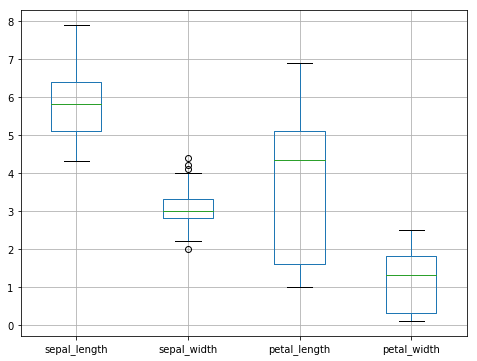

In [47]:
iris.plot.box(figsize=(8,6))
plt.grid()
plt.show()

## 8.1 Scatter Plot

Il plot sopra ci permette di studiare alcune caratteristiche delle variabili. Tuttavia esso tratta i dati come $4$ campioni univariati indipendenti e dunque non mette in evidenza le eventuali relazioni che sussistono tra le variabili. Se consideriamo i dati in maniera univariata, possiamo considerare ognuna delle osservazioni come un punto che vive in uno spazio a $4$ dimensioni. In principio, sarebbe interessante studiare come tali dati si distribuiscono nello spazio, ma in pratica possiamo visualizzare al massimo punti dello spazio tridimensionale. Inoltre, i plot 3D sono in genere meno leggibili dei plot 2D. 

Un primo modo per visualizzare i dati, consiste dunque nello scegliere una coppia di variabili e plottare le osservazioni come se fossero punti in uno spazio 2D. Questo tipo di grafico si chiama **scatter plot**. Scegliamo ad esempio `sepal_width` e `petal_width` e visualizziamone lo scatter plot mediante la libreria `seaborn`:

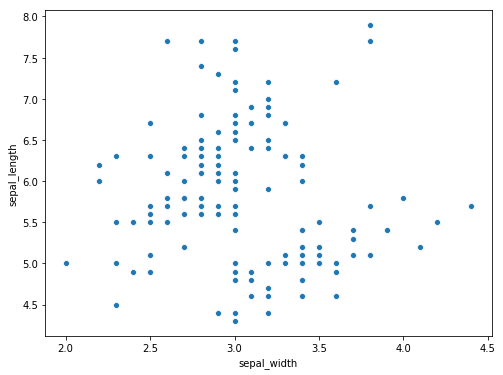

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['sepal_width'], iris['sepal_length'])
plt.show()

Possiamo colorare i punti in maniera diversa a seconda dell'appartenenza alle diverse classi di iris utilizzando il parametro `hue`:

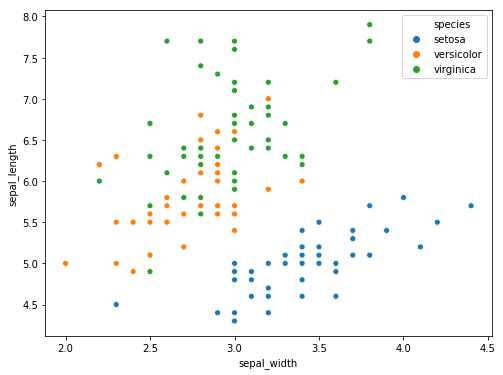

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['sepal_width'], iris['sepal_length'], hue=iris['species'])
plt.show()

**Domanda 14**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Cosa apprendiamo dal plot? La coppia di variabili considerata costituisce un fattore discriminante per l'appartenenza alle diverse classi?

**Risposta 14**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Lo scatterplot può essere effettuato con diverse coppie di variabili. Consideriamo la coppia (`sepal_length`, `petal_length`):

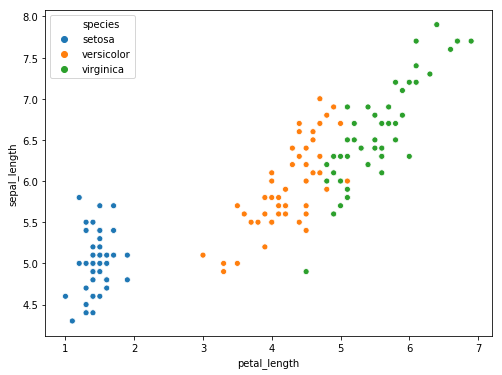

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['petal_length'], iris['sepal_length'], hue=iris['species'])
plt.show()

**Domanda 15**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confronti l'ultimo scatterplot visualizzato con lo scatterplot visto in precedenza. La nuova coppia di variabili costituisce un fattore discriminante per l'appartenenza alle diverse classi?

**Risposta 15**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Come possiamo notare dai due plot, ogni coppia di variabili ci permette di vedere "una parte" delle possibili interazioni tra le diverse variabili. Per avere un quadro più completo, in pratica si visualizzano gli scatter plot di tutte le coppie possibili. Questo plot prende il nome di scatter matrix. Possiamo ottenere una scatter matrix con `seaborn` come segue:

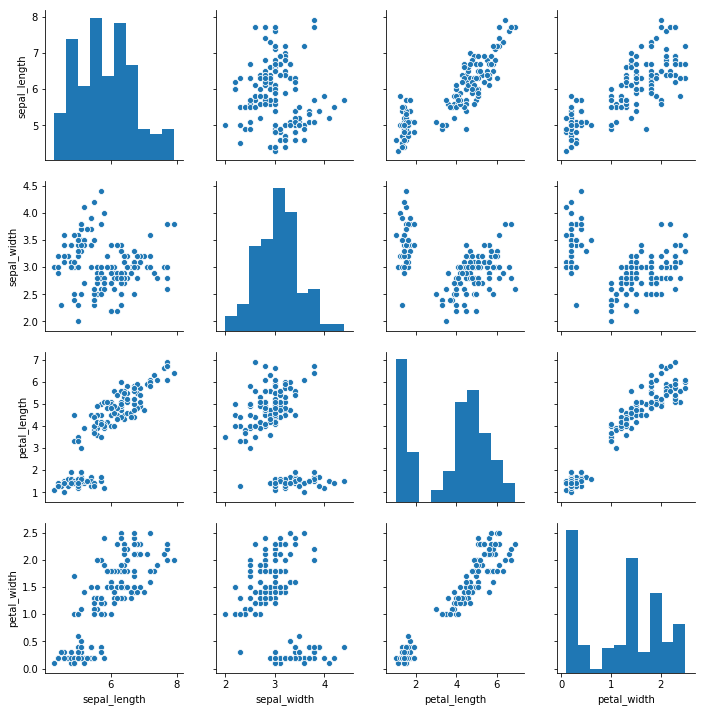

In [51]:
sns.pairplot(iris)
plt.show()

**Domanda 16**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Perché sulla diagonale principale vengono mostrati degli istogrammi al posto di scatter plot? Si mostrino gli scatterplot corrispondenti alle coppie di variabili sulla diagonale principale.

**Risposta 16**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Possiamo evidenziare i punti per classe specificando una variabile sulla base della quale colorare i punti:

C:\Users\anton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


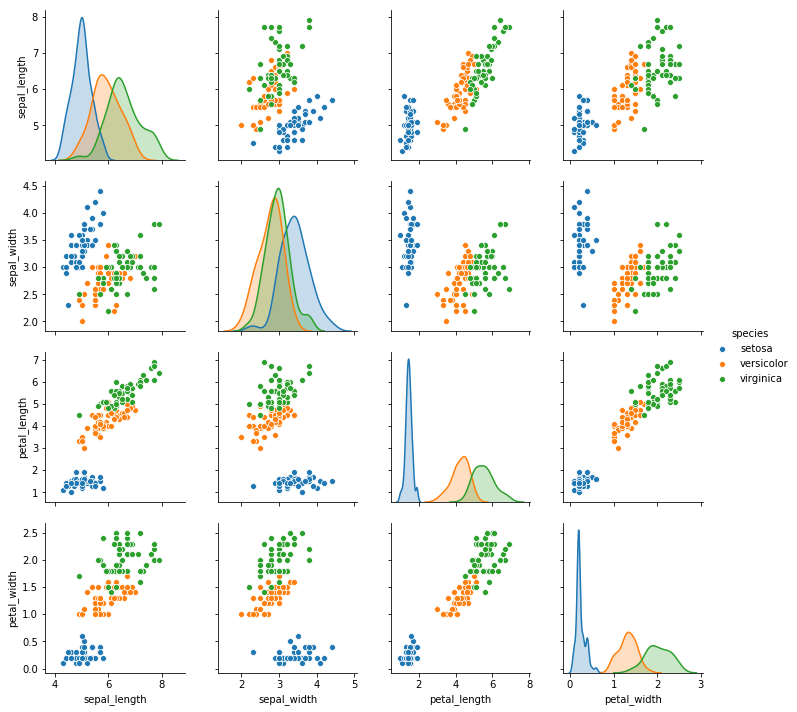

In [52]:
sns.pairplot(iris, hue='species')
plt.show()

**Domanda 17**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Esiste una coppia di variabili che individua uno spazio nel quale le osservazioni appartenenti alle diverse classi sono maggiormente distinte? Esiste una unica variabile che presenta distribuzioni particolarmente diverse a seconda dell'appartenenza alle tre classi?

**Risposta 17**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## 8.2 Medie e Covarianze

Nel caso **multivariato**, la **media** viene calcolata in maniera del tutto analoga al caso **univariato** come **media di vettori**. Possiamo banalmente calcolare la media dei nostri dati multivariati mediante il metodo `mean`:

In [53]:
print(iris.mean()) 

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


Il risultato sarà un vettore (una serie di Pandas) che individua un punto nello spazio a quattro dimensioni che rappresenta la media delle osservazioni. Vediamo un semplice esempio a due dimensioni, considerando solo alcune variabili:

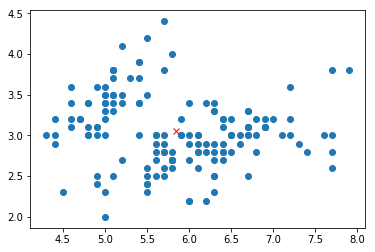

In [54]:
iris2d = iris[['sepal_length','sepal_width']]
mean_point = iris2d.mean()
plt.scatter(iris2d['sepal_length'],iris2d['sepal_width'])
plt.plot(mean_point[0], mean_point[1],'rx')
plt.show()

La croce rossa rappresenta il punto medio del dataset bidimensionale considerato.

Il concetto di **varianza** viene generalizzato dal concetto di **covarianza** nel caso di dati bivariati. La covarianza misura quanto le due variabili varino assieme e si misura come segue:

\begin{equation}
\sigma_{XY} = \frac{1}{N}\sum_i^N (x_i - \overline x) (y_i - \overline y)
\end{equation}

dove $X$ e $Y$ sono le due variabili di interesse, $x_i$ è il valore di $X$ per l'iesima osservazione, $y_i$ è il valore di $Y$ per l'iesima osservazione e $\overline x$, $\overline y$ sono le medie delle osservazioni per le due variabili $X$ e $Y$.

Intuitivamente, la covarianza assumerà valori molto positivi quando $X$ e $Y$ variano in maniera concorde (ovvero, se $X$ assume valori alti, $Y$ assume valori alti e se $X$ assume valori bassi $Y$ assume valori bassi). In tal caso infatti i segni dei due fattori all'interno della sommatoria saranno concordi e il loro prodotto avrà segno positivo. Se invece $X$ e $Y$ variano in maniera discorde, il prodotto avrà segno negativo e la varianza assumerà valori negativi.

**Domanda 18**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

A cosa corrisponde la varianza se $X=Y$?

**Risposta 18**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

In pratica, in presenza di più variabili, si calcolano le covarianze di tutte le coppie possibili di variabili, un po' come visto nel caso della scatter matrix. Ciò si ottiene mediante il metodo `cov`:

In [55]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


**Domanda 19**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Che cosa rappresentano i valori sulla diagonale principale?

**Risposta 19**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

**Domanda 20**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Ci sono coppie di variabili che presentano covarianze fortemente positive? Si confrontino i valori della matrice di covarianza con i relativi plot dello scatterplot. I due indicatori ci dicono la stessa cosa?

**Risposta 20**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## 8.3 Coordinate Parallele

Gli scatterplot permettono di esplorare le relazioni tra coppie di variabili. Quando i dati sono divisi in classi, un diagramma che permette di mostrare le relazioni tra variabili allo stesso tempo è il diagramma a coordinate parallele. Tali diagrammi si possono ottenere usando la funzione `parallel_coordinates` di `Pandas`:

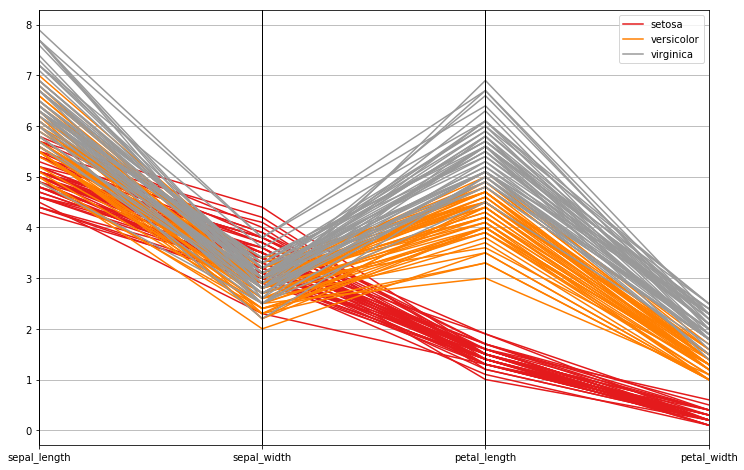

In [56]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,8))
parallel_coordinates(iris, 'species', colormap=plt.get_cmap("Set1"))
plt.show()

Nel plot visualizzato sopra:
 * Ogni asse verticale rappresenta una diversa variabile;
 * Ogni osservazione è rappresentata da un linea diversa;
 * Ogni linea congiunge i punti degli assi corrispondenti ai valori assunti dalle diverse variabili. Ad esempio, se un'osservazione assume valori $[10,2,5,4]$, la linea corrispondente intersecherà il primo asse nel punto di ordinata pari a $10$, il secondo nel punto di ordinata pari a $2$, il terzo nel punto di ordinata pari a $5$ e il quarto nel punto di ordinata pari a $4$;
 * Il colore di ogni riga identifica la classe di appartenenza dell'osservazione corrispondente, come da legenda.

**Domanda 21**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Cosa ci dice il diagramma a coordinate parallele sulle variabili? Esistono delle variabili che, da sole costituiscono fattore discriminante per l'appartenenza alle classi? L'osservazione è coerente con quanto appreso dal pairplot?

**Risposta 21**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Se vogliamo, possiamo restringere l'analisi ad alcune variabili come segue:

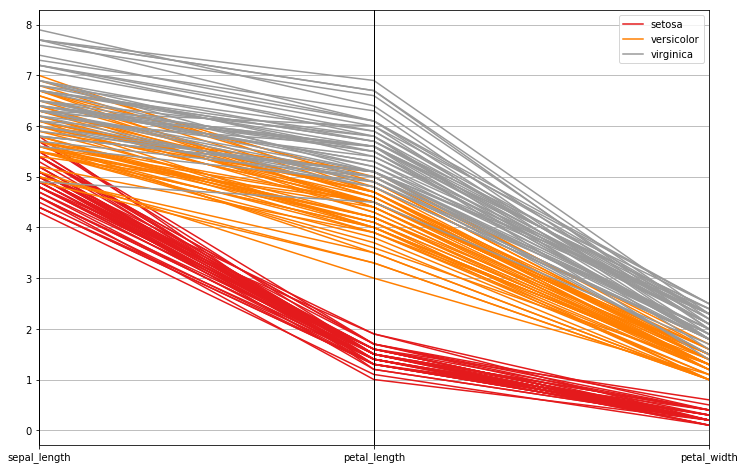

In [57]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,8))
parallel_coordinates(iris[['sepal_length','petal_length','petal_width','species']], 
                     'species', colormap=plt.get_cmap("Set1"))
plt.show()

# Esercizi

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">
<b>Esercizio 1</b>

Considerando il dataset Titanic, si calcolino per ogni variabile la numerosità, la media, la deviazione standard, il minimo, il massimo, il valore mediano, il primo e il terzo quartile. Dopo aver calcolato i valori richiesti individualmente, si utilizzi il metodo `describe` per ottenere tali valori. Qual è la variabile più dispersa?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">
<b>Esercizio 2</b>

Considerando il dataset Titanic, per ognuna delle tre classi, si calcolino medie e varianze delle età dei passeggeri. In quale classe le età sono meno disperse? Quale classe contiene i soggetti più giovani? Si completi l'analisi con dei grafici a barre.

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">
<b>Esercizio 3</b>

Si aggiunga al dataset Titanic una nuova colonna "Old" che assume valore pari a 1 per le osservazioni che presentano età superiore al valore medio e 0 altrimenti. Si calcoli dunque una crosstab che calcoli il numero di soggetti "anziani" (soggetti per i quali old è pari a 1) rispetto alle variabili Pclass e Sex. Si mostri un barplot a partire dalla tabella. In quale classe gli uomini tendono ad essere molto più anziani delle donne?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">
<b>Esercizio 4</b>

Si carichi il dataset mpg mediante la libreria seaborn (usare l'istruzione `t=sns.load_dataset('mpg')`). Si visualizzi la scatter matrix differenziando i colori dei punti a seconda dei valori della variabile `origin`. Chi produce le macchine più pesanti? Esistono coppie di variabili che costituiscono un fattore decisivo per distinguere una delle origini dalle altre?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">
<b>Esercizio 5</b>

Considerando il dataset `mpg`, si scelga un gruppo di variabili rispetto alle quali ottenere un diagramma a coordinate parallele. Che cosa possiamo inferire dal diagramma?